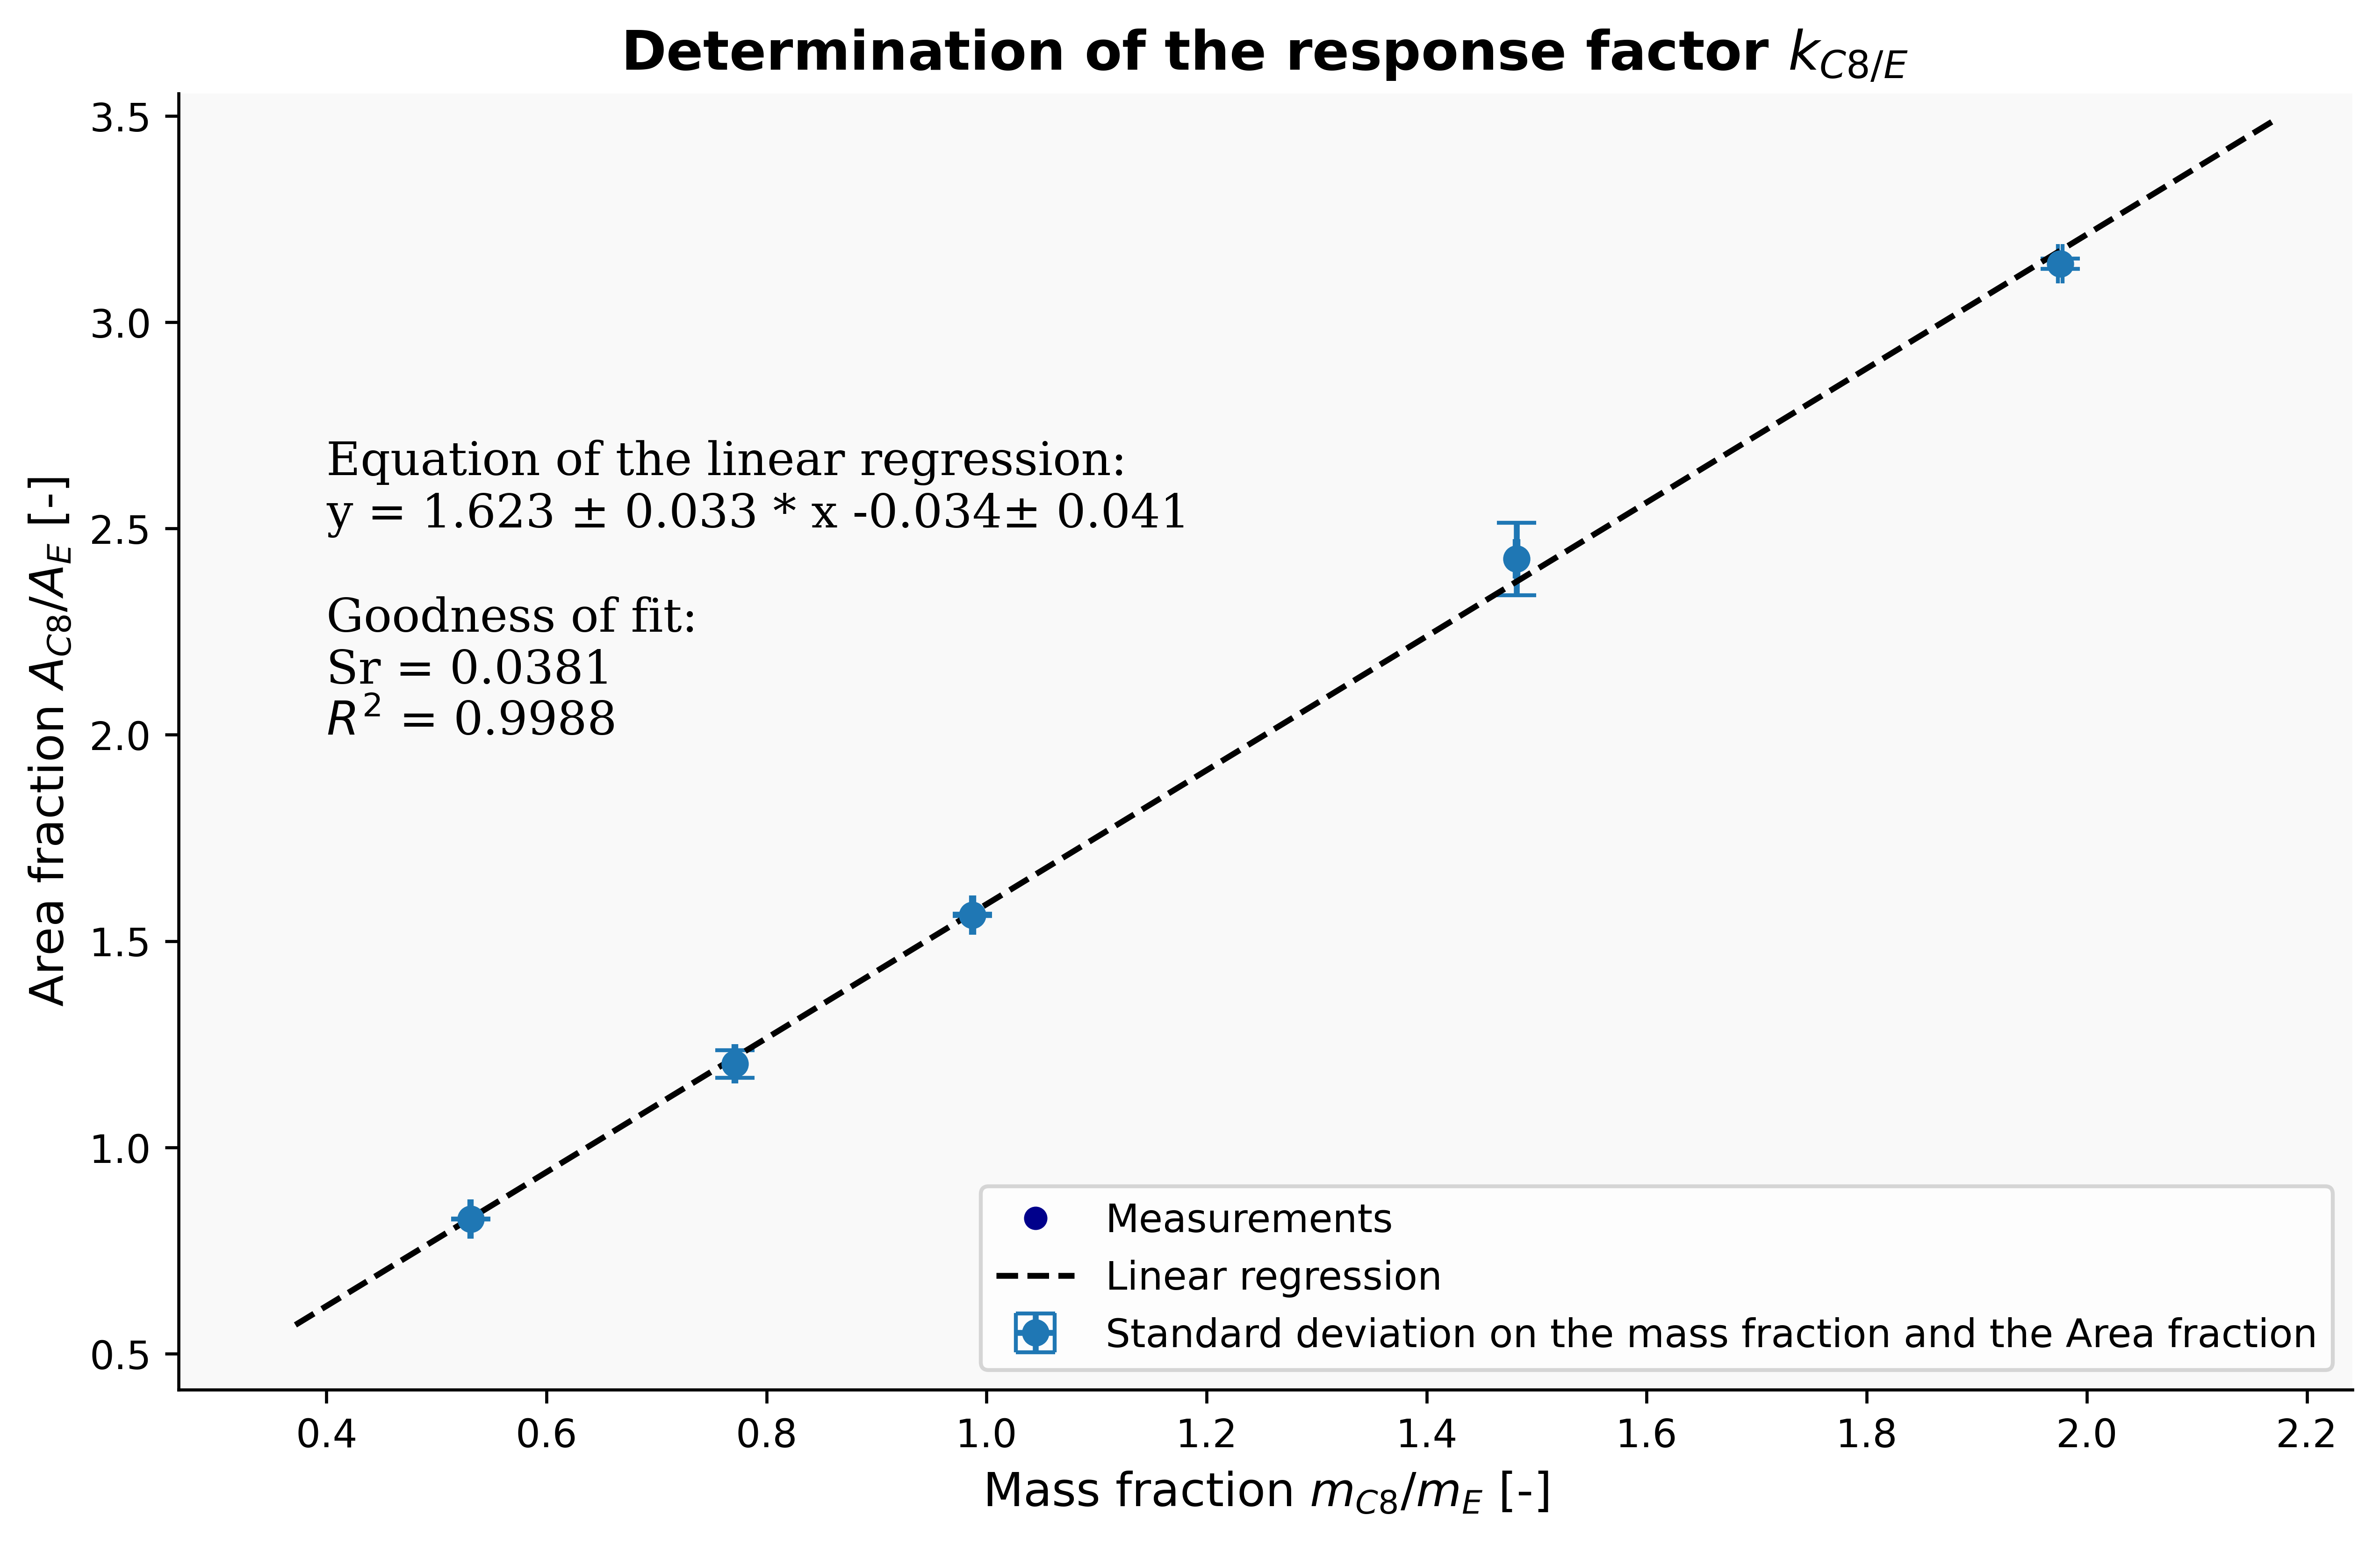

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
import math


def read_excel_data(file_path):
    df = pd.read_excel(file_path, sheet_name="Quantitatif", skiprows=0)
    return df

def plot_graph(data_frame):
    x = data_frame['x'][1:6].tolist()
    y = data_frame['y'][1:6].tolist()
    y_err = data_frame["y_err"][1:6].tolist()
    x_err = data_frame['x_err'][1:6].tolist()
    
    plt.figure(figsize=(10, 6), dpi = 600)  # Adjust figure size for better presentation

    # Plot data with specific style elements
    plt.plot(x, y, label='Measurements', color='darkblue', linestyle='', marker='o', markersize=5, linewidth=1.5)
    
    plt.xlabel('Mass fraction ${{m}_{C8}}/{{m}_{E}}$ [-]', fontsize=12)
    plt.ylabel('Area fraction ${{A}_{C8}}/{{A}_{E}}$ [-]', fontsize=12)
    plt.title('Determination of the response factor ${k}_{C8/E}$ ', fontsize=14, weight='bold')

    # Adjust grid density
    plt.xticks(ticks=plt.xticks()[0][::1], fontsize=10, rotation ='horizontal')
    plt.yticks(ticks=plt.yticks()[0][::1], fontsize=10)

    plt.grid(False)

    # Add a subtle background color
    plt.gca().set_facecolor('#f9f9f9')

    # Remove spines for cleaner appearance
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
     # Set x-axis and y-axis limits
    delta_x=min(x)*0.5
    delta_y=min(y)*0.5
    plt.xlim(min(x)-delta_x, max(x)+delta_x)
    plt.ylim(min(y)-delta_y, max(y)+delta_y)
    
    # Plot with error bars
    plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', capsize=5, label='Standard deviation on the mass fraction and the Area fraction')
    
    
    # Linear regression: y = m(+-Sm)*x + b(+-Sb)
    fit_params = np.polyfit(x, y, 1)
    new_x = np.linspace(min(x)*0.7, max(x)*1.1, 100)
    fit_line = [(fit_params[0]*x + fit_params[1]) for x in new_x]
    plt.plot(new_x, fit_line, label=f'Linear regression', color='black', linestyle='--', linewidth=1.5)
    
    #Statistical parameters
    N = len(x)
    avg_x = sum(x)/N
    avg_y = sum(y)/N
    Sxx = sum(x**2 for x in x) - N*(avg_x**2)
    Syy = sum(x**2 for x in y) - N*(avg_y**2)
    Sxy = sum(x * y for x, y in zip(x, y)) - N*avg_y*avg_x
    r = Sxy/math.sqrt(Sxx*Syy)
    m = fit_params[0] #equivaut à Sxy/Sxx
    b = fit_params[1]
    R = (np.corrcoef(x, y)[0,1])**2 # R coefficient
    Sr = math.sqrt((Syy - (m**2)*Sxx)/(N-2))
    Sm = math.sqrt((Sr**2)/Sxx)
    Sb = Sr*math.sqrt((Sxx + N*(avg_x**2))/(N*Sxx))
    equation = f'y = {m:.3f} \u00B1 {Sm:.3f} * x {b:.3f}\u00B1 {Sb:.3f}'
    text = f"Equation of the linear regression:\n"+f"{equation}\n\n"+f"Goodness of fit:\n"+f"Sr = {Sr:.4f}\n"+f"$R^{{2}}$ = {R:.4f}"
    plt.legend(loc='lower right')
    plt.text(0.4, 2, text, fontsize=12, family = "serif" )
    
    
def save_svg(file_path):
    plt.savefig(file_path + ".png", format='png')  # Save as a PNG file for matplotlib

def main():
    excel_file_path = r"C:/Users/nilst/Documents/EPFL/BA_4/TP_Analytique/GC/Resultats.xlsx"
    download_folder =r"C:/Users/nilst/Documents/EPFL/BA_4/TP_Analytique/GC"

    # Read data from Excel file
    data = read_excel_data(excel_file_path)

    # Plot the graph
    plot_graph(data)
    
    # Save the graph as an SVG file and download it
    svg_file_path = os.path.join(download_folder, 'graph_reg_lin')
    save_svg(svg_file_path)
    
    plt.show()

if __name__ == "__main__":
    main()
